In [38]:
# %load ../../style.py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import colorConverter
from matplotlib import rcParams
import seaborn as sns
from scipy.optimize import curve_fit

sns.set(style='ticks', palette='Set2') 
sns.despine()

fontsize_labels = 26    # size used in latex document
rcParams['text.latex.preamble'] = [r'\usepackage[cmbright]{sfmath}']
rcParams['font.family']= 'sans-serif'
rcParams['font.sans-serif']= 'cmbright'
rcParams['font.weight'] = "light"

rcParams['text.usetex'] = True

rcParams['figure.autolayout'] = True
rcParams['font.size'] = fontsize_labels
rcParams['axes.labelsize'] = fontsize_labels
rcParams['xtick.labelsize'] = fontsize_labels
rcParams['ytick.labelsize'] = fontsize_labels
rcParams['legend.fontsize'] = fontsize_labels
rcParams['axes.titlesize'] = fontsize_labels
xfactor = 2
rcParams['figure.figsize'] = (xfactor*6.2, xfactor*3.83)  


In [40]:
from scipy.optimize import curve_fit
from scipy.optimize import leastsq

import uncertainties as uc
import uncertainties.unumpy as un

import pickle
import itertools

chars=["Electrons","Muons","Tauons","Hadrons"]

gamma_m 	 0.084+/-0.004
gamma_e 	 0.084+/-0.004
gamma_t 	 0.084+/-0.004
gamma_Z 	 2.558+/-0.020
Mz      	 91.186+/-0.008
gamma_h 	 1.78+/-0.09


/usr/lib/python3.4/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


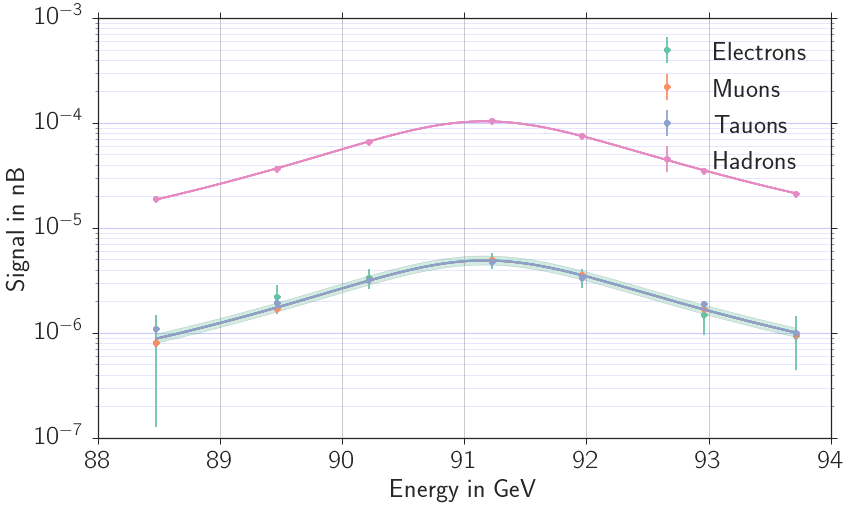

In [51]:
crosssections = pickle.load( open("data/crosssection.p","rb"))
cross_total = un.nominal_values(list(crosssections.values()))
cross_total_error = un.std_devs(list(crosssections.values()))

E = (np.array(4*list(crosssections.keys())).reshape(4,7).swapaxes(0,1))


def Breit_Wigner(s,p):
    gamma_e, gamma_m,gamma_t,gamma_h,gamma_Z,Mz = p
    gamma_f = np.array([gamma_e,gamma_m,gamma_t,gamma_h])
    return 12*np.pi / Mz**2 * (gamma_e*gamma_f*s)/((s - Mz**2)**2 +(s*gamma_Z/Mz)**2)


p0 = [80,80,80,1600,2.5,90]

def residuals(p):
    return (cross_total - Breit_Wigner(E**2,p)).flatten()

def residuals_weighted(p,error):
    weights = 1 / error
    return (weights*(cross_total - Breit_Wigner(E**2,p))).flatten()

p,cov,infodict,mesg,ier = leastsq(residuals_weighted,p0,args=cross_total_error,full_output=True)
len_data = len(residuals(p))
chi_sq = (residuals(p)**2).sum()/(len_data-len(p))
p_uc = uc.correlated_values(p, cov)
keys = ["gamma_e", "gamma_m","gamma_t","gamma_h","gamma_Z","Mz     "]
params = dict(zip(keys,p_uc))
gamma_e, gamma_m,gamma_t,gamma_h,gamma_Z,Mz = p_uc

for k in params:
    print(k,"\t",params[k])
    
f, ax1 = plt.subplots(1, 1)

palette = itertools.cycle(sns.color_palette())

E_ = np.array([np.linspace(np.min(E),np.max(E),1000)]*4).swapaxes(0,1)
data_fit = Breit_Wigner(E_**2,p)
error_mat = Breit_Wigner(E_**2,p_uc)
error_on_fit = np.array([un.std_devs(error_mat[:,k]) for k in range(4)]).swapaxes(0,1)   
data_fit_min = data_fit - error_on_fit
data_fit_max = data_fit + error_on_fit

for k in range(4):
    color=next(palette)
    ax1.errorbar(E[:,0], cross_total[:,k],color=color, label = chars[k],yerr=cross_total_error[:,k],fmt='o') 
    
    ax1.plot(E_,data_fit[:,k],color=color)
    ax1.fill_between(E_[:,0], 1.0*data_fit_min[:,k] , 1.0*data_fit_max[:,k], facecolor=color, alpha=0.3 )

p_lit = [83.39,83.39,83.39,1670,2.4,91.187]
data_fit = Breit_Wigner(E_**2,p_lit)

    
ax1.set_yscale("log")
ax1.yaxis.grid(True,'minor',linewidth=0.5,color = "blue", alpha = 0.2)
ax1.yaxis.grid(True,'major',linewidth=1.2, color = "blue", alpha = 0.2)
ax1.xaxis.grid(True)
ax1.legend()
plt.ylabel("Signal in nB")
plt.xlabel("Energy in GeV")
plt.savefig("../figures/crosssections.pdf")
plt.show()

gamma_m 	 0.084+/-0.004
gamma_e 	 0.084+/-0.004
gamma_t 	 0.084+/-0.004
gamma_Z 	 2.558+/-0.020
Mz      	 91.186+/-0.008
gamma_h 	 1.78+/-0.09


/usr/lib/python3.4/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


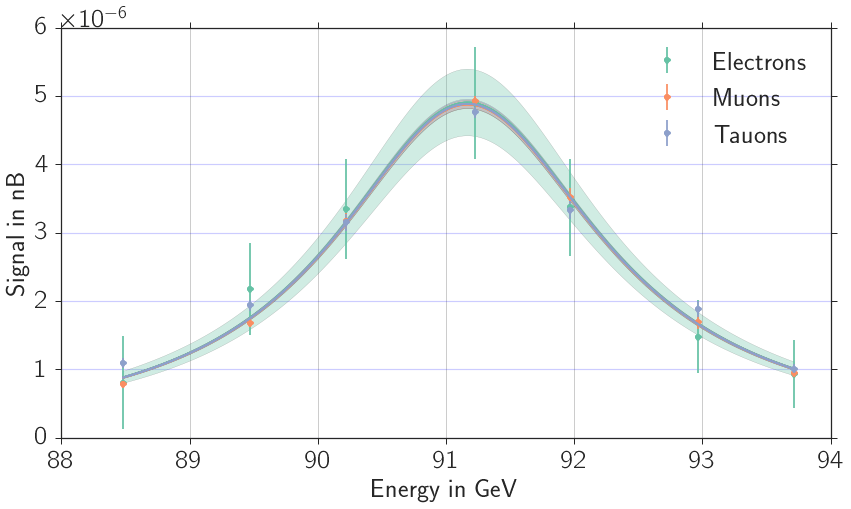

In [52]:
crosssections = pickle.load( open("data/crosssection.p","rb"))
cross_total = un.nominal_values(list(crosssections.values()))
cross_total_error = un.std_devs(list(crosssections.values()))

E = (np.array(4*list(crosssections.keys())).reshape(4,7).swapaxes(0,1))


def Breit_Wigner(s,p):
    gamma_e, gamma_m,gamma_t,gamma_h,gamma_Z,Mz = p
    gamma_f = np.array([gamma_e,gamma_m,gamma_t,gamma_h])
    return 12*np.pi / Mz**2 * (gamma_e*gamma_f*s)/((s - Mz**2)**2 +(s*gamma_Z/Mz)**2)


p0 = [80,80,80,1600,2.5,90]

def residuals(p):
    return (cross_total - Breit_Wigner(E**2,p)).flatten()

def residuals_weighted(p,error):
    weights = 1 / error
    return (weights*(cross_total - Breit_Wigner(E**2,p))).flatten()

p,cov,infodict,mesg,ier = leastsq(residuals_weighted,p0,args=cross_total_error,full_output=True)
len_data = len(residuals(p))
chi_sq = (residuals(p)**2).sum()/(len_data-len(p))
p_uc = uc.correlated_values(p, cov)
keys = ["gamma_e", "gamma_m","gamma_t","gamma_h","gamma_Z","Mz     "]
params = dict(zip(keys,p_uc))
gamma_e, gamma_m,gamma_t,gamma_h,gamma_Z,Mz = p_uc

for k in params:
    print(k,"\t",params[k])
    
f, ax1 = plt.subplots(1, 1)

palette = itertools.cycle(sns.color_palette())

E_ = np.array([np.linspace(np.min(E),np.max(E),1000)]*4).swapaxes(0,1)
data_fit = Breit_Wigner(E_**2,p)
error_mat = Breit_Wigner(E_**2,p_uc)
error_on_fit = np.array([un.std_devs(error_mat[:,k]) for k in range(4)]).swapaxes(0,1)   
data_fit_min = data_fit - error_on_fit
data_fit_max = data_fit + error_on_fit

for k in range(3):
    color=next(palette)
    ax1.errorbar(E[:,0], cross_total[:,k],color=color, label = chars[k],yerr=cross_total_error[:,k],fmt='o') 
    
    ax1.plot(E_,data_fit[:,k],color=color)
    ax1.fill_between(E_[:,0], 1.0*data_fit_min[:,k] , 1.0*data_fit_max[:,k], facecolor=color, alpha=0.3 )

p_lit = [83.39,83.39,83.39,1670,2.4,91.187]
data_fit = Breit_Wigner(E_**2,p_lit)

    
#ax1.set_yscale("log")
ax1.yaxis.grid(True,'minor',linewidth=0.5,color = "blue", alpha = 0.2)
ax1.yaxis.grid(True,'major',linewidth=1.2, color = "blue", alpha = 0.2)
ax1.xaxis.grid(True)
ax1.legend()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel("Energy in GeV")
plt.ylabel("Signal in nB")
plt.savefig("../figures/crosssections2.pdf")
plt.show()

In [57]:
s= " \t  "
for i in range(6):
    s+=keys[i]+ " \t"
print(s)
for i,row in enumerate(cov):
    s=    keys[i]+" | "
    for item in row:
        s+= "%.5f \t"%item
    print(s)

 	  gamma_e 	gamma_m 	gamma_t 	gamma_h 	gamma_Z 	Mz      	
gamma_e | 0.00004 	-0.00004 	-0.00004 	-0.00082 	0.00001 	0.00000 	
gamma_m | -0.00004 	0.00004 	0.00004 	0.00082 	0.00001 	0.00000 	
gamma_t | -0.00004 	0.00004 	0.00005 	0.00094 	0.00001 	0.00000 	
gamma_h | -0.00082 	0.00082 	0.00094 	0.01737 	0.00017 	0.00003 	
gamma_Z | 0.00001 	0.00001 	0.00001 	0.00017 	0.00031 	0.00004 	
Mz      | 0.00000 	0.00000 	0.00000 	0.00003 	0.00004 	0.00005 	


In [103]:
keys2 = ['$\Gamma_e$', '$\Gamma_\mu$', '$\Gamma_\\tau$', '$\Gamma_h$', '$\Gamma_Z$', '$M_Z$']
corr = np.corrcoef(cov)
s = "\\begin{tabular}{l| l| l| l |l | l|l}\n"
s += "\\rowcolor{LightCyan} & $\Gamma_e$ & $\Gamma_\mu$ & $\Gamma_\\tau$ & $\Gamma_h$ &$\Gamma_Z$ & $M_Z$ \\\\ \n"
for line in range(6):
    s += "\cellcolor{LightCyan} "+ keys2[line]+" "
    for item in range(6):
        s+=("& $%.5f$ "%(corr[line,item]))
    s+=("\\\\ \n")
s+= "\\end{tabular}"
print(s)

\begin{tabular}{l| l| l| l |l | l|l}
\rowcolor{LightCyan} & $\Gamma_e$ & $\Gamma_\mu$ & $\Gamma_\tau$ & $\Gamma_h$ &$\Gamma_Z$ & $M_Z$ \\ 
\cellcolor{LightCyan} $\Gamma_e$ & $1.00000$ & $-0.99858$ & $-0.99856$ & $-0.99905$ & $-0.13433$ & $-0.15716$ \\ 
\cellcolor{LightCyan} $\Gamma_\mu$ & $-0.99858$ & $1.00000$ & $0.99999$ & $0.99995$ & $0.18680$ & $0.18144$ \\ 
\cellcolor{LightCyan} $\Gamma_\tau$ & $-0.99856$ & $0.99999$ & $1.00000$ & $0.99994$ & $0.18711$ & $0.18120$ \\ 
\cellcolor{LightCyan} $\Gamma_h$ & $-0.99905$ & $0.99995$ & $0.99994$ & $1.00000$ & $0.17727$ & $0.17895$ \\ 
\cellcolor{LightCyan} $\Gamma_Z$ & $-0.13433$ & $0.18680$ & $0.18711$ & $0.17727$ & $1.00000$ & $0.48489$ \\ 
\cellcolor{LightCyan} $M_Z$ & $-0.15716$ & $0.18144$ & $0.18120$ & $0.17895$ & $0.48489$ & $1.00000$ \\ 
\end{tabular}


In [77]:
keys

['gamma_e', 'gamma_m', 'gamma_t', 'gamma_h', 'gamma_Z', 'Mz     ']

# Leptonuniversality

In [54]:
V_mu = gamma_m / gamma_e
print(V_mu)

0.99+/-0.10


In [55]:
V_tau = gamma_t / gamma_e

In [56]:
print(V_tau)

1.00+/-0.10


# Number of Neutrino families

In [71]:
gamma_nu = gamma_Z - gamma_e - gamma_m - gamma_t - gamma_h
gamma_nu_theo = uc.ufloat(0.165,0.001)
print(gamma_nu/gamma_nu_theo)

3.2+/-0.6


In [66]:
gamma_e

0.08415717784875468+/-0.004201066276394762

In [10]:
x = uc.ufloat(1,0.1)

In [11]:
x.__str__()

'1.00+/-0.10'

In [14]:
A = np.zeros([10,10])
As = np.zeros([10,10])
mat = un.umatrix(A,As)

In [17]:
x = un.uarray(np.random.random([10]),0.1*np.random.random(10))

In [23]:
mat[0,:]= x[:]

In [28]:
np.sum(mat[0,:])

4.166136572856776+/-0.18462829303989287

In [29]:
Q = np.load("data/C_eff.npy")

In [42]:
np.dot(mat,x)[0,1]

0.0+/-0

In [59]:
cross_total

array([[[  4.0264756 ,   1.41202011,   1.37241074,  29.74980174]],

       [[  3.35336208,   0.19795542,   0.52606954,   5.43977027]],

       [[  3.6595686 ,   0.45146179,   0.6776835 ,   9.98120649]],

       [[  3.85349824,   0.89022997,   0.93917095,  18.08119762]],

       [[  3.38686697,   1.16711439,   1.13959833,  24.3054781 ]],

       [[  2.6404849 ,   0.64783039,   0.80622629,  13.84393773]],

       [[  2.44234359,   0.42797586,   0.65093952,   9.77715302]]])

In [66]:
cc = np.array(cross_total)

In [68]:
cc.reshape(7,4)

array([[  4.0264756 ,   1.41202011,   1.37241074,  29.74980174],
       [  3.35336208,   0.19795542,   0.52606954,   5.43977027],
       [  3.6595686 ,   0.45146179,   0.6776835 ,   9.98120649],
       [  3.85349824,   0.89022997,   0.93917095,  18.08119762],
       [  3.38686697,   1.16711439,   1.13959833,  24.3054781 ],
       [  2.6404849 ,   0.64783039,   0.80622629,  13.84393773],
       [  2.44234359,   0.42797586,   0.65093952,   9.77715302]])

In [69]:
cc

array([[[  4.0264756 ,   1.41202011,   1.37241074,  29.74980174]],

       [[  3.35336208,   0.19795542,   0.52606954,   5.43977027]],

       [[  3.6595686 ,   0.45146179,   0.6776835 ,   9.98120649]],

       [[  3.85349824,   0.89022997,   0.93917095,  18.08119762]],

       [[  3.38686697,   1.16711439,   1.13959833,  24.3054781 ]],

       [[  2.6404849 ,   0.64783039,   0.80622629,  13.84393773]],

       [[  2.44234359,   0.42797586,   0.65093952,   9.77715302]]])

In [75]:
x[0]*=10

In [76]:
x

array([53.24832527700394+/-0.44461033690990526,
       0.4181668599823981+/-0.056231755988155635,
       0.707794603248798+/-0.07266988316664731,
       0.15230694660358957+/-0.020929987950580077,
       0.2991144170669825+/-0.05989202437989231,
       0.4338987498499758+/-0.057496683986228495,
       0.2690259321667492+/-0.07644218705867242,
       0.5486108991404033+/-0.059314144822759075,
       0.287198720269196+/-0.01746001223387115,
       0.5175361917586445+/-0.09288434227451736], dtype=object)

In [4]:
k =un.umatrix(np.random.random([10,10]),np.random.random([10,10]))

In [98]:
np.corrcoef(cov)

array([[ 1.        , -0.99858374, -0.99856479, -0.99905318, -0.1343306 ,
        -0.15716213],
       [-0.99858374,  1.        ,  0.99998771,  0.99994559,  0.18679661,
         0.18143669],
       [-0.99856479,  0.99998771,  1.        ,  0.99993955,  0.18711186,
         0.18120499],
       [-0.99905318,  0.99994559,  0.99993955,  1.        ,  0.17726776,
         0.17894881],
       [-0.1343306 ,  0.18679661,  0.18711186,  0.17726776,  1.        ,
         0.48489184],
       [-0.15716213,  0.18143669,  0.18120499,  0.17894881,  0.48489184,
         1.        ]])

array([ -2.88428165e-06,   2.94313647e-06,   2.94869488e-06,
         6.28787536e-05,   1.45372229e-06,   2.98052628e-07])